#### GENERAL

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sqlite3

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
db_path= r'C:\PI\Proyecto Final\travel.sqlite'

In [6]:
conexion = sqlite3.connect(db_path)

In [7]:
df_tickets= pd.read_sql_query("SELECT * FROM tickets", conexion)

print(df_tickets.head())

       ticket_no book_ref passenger_id
0  0005432000987   06B046  8149 604011
1  0005432000988   06B046  8499 420203
2  0005432000989   E170C3  1011 752484
3  0005432000990   E170C3  4849 400049
4  0005432000991   F313DD  6615 976589


In [8]:
df_boarding_passes= pd.read_sql_query("SELECT * FROM boarding_passes", conexion)

print(df_boarding_passes.head())

       ticket_no  flight_id  boarding_no seat_no
0  0005435212351      30625            1      2D
1  0005435212386      30625            2      3G
2  0005435212381      30625            3      4H
3  0005432211370      30625            4      5D
4  0005435212357      30625            5     11A


In [9]:
df_bookings = pd.read_sql_query("SELECT * FROM bookings", conexion)


In [10]:
df_tickets.columns

Index(['ticket_no', 'book_ref', 'passenger_id'], dtype='object')

In [11]:
df_bookings.columns

Index(['book_ref', 'book_date', 'total_amount'], dtype='object')

In [15]:
df_tickets_flights = pd.read_sql_query("SELECT * FROM ticket_flights", conexion)


In [21]:
df_flights = pd.read_sql_query("SELECT * FROM flights", conexion)
print(df_flights.head(5))

   flight_id flight_no     scheduled_departure       scheduled_arrival  \
0       1185    PG0134  2017-09-10 09:50:00+03  2017-09-10 14:55:00+03   
1       3979    PG0052  2017-08-25 14:50:00+03  2017-08-25 17:35:00+03   
2       4739    PG0561  2017-09-05 12:30:00+03  2017-09-05 14:15:00+03   
3       5502    PG0529  2017-09-12 09:50:00+03  2017-09-12 11:20:00+03   
4       6938    PG0461  2017-09-04 12:25:00+03  2017-09-04 13:20:00+03   

  departure_airport arrival_airport     status aircraft_code actual_departure  \
0               DME             BTK  Scheduled           319               \N   
1               VKO             HMA  Scheduled           CR2               \N   
2               VKO             AER  Scheduled           763               \N   
3               SVO             UFA  Scheduled           763               \N   
4               SVO             ULV  Scheduled           SU9               \N   

  actual_arrival  
0             \N  
1             \N  
2          

In [13]:
df_tickets.shape

(366733, 3)

In [12]:
conteo_pasajeros = df_tickets.groupby('passenger_id').count()
print(conteo_pasajeros)

              ticket_no  book_ref
passenger_id                     
0000 000343           1         1
0000 035204           1         1
0000 076149           1         1
0000 112600           1         1
0000 214126           1         1
...                 ...       ...
9999 898268           1         1
9999 913541           1         1
9999 935084           1         1
9999 939010           1         1
9999 979738           1         1

[366733 rows x 2 columns]


In [33]:
pd.set_option('display.float_format', '{:,.2f}'.format)


#### Frecuencia

In [15]:
conteo_duplicados = df_tickets.duplicated(subset='passenger_id')[df_tickets.duplicated(subset='passenger_id')== True]
print(conteo_duplicados)

Series([], dtype: bool)


No se puede analizar frecuencia de viajes por cliente porque no tenemos base con datos de pasajero y aquí el passenger_id es un identificador único. Por cada ticket es un pasajero.

#### Estacionalidad

In [18]:
df_bookings['book_date'] = pd.to_datetime(df_bookings['book_date'])

df_bookings = df_bookings.set_index('book_date')


In [19]:
df_bookings_fechas = df_bookings

In [58]:
df_bookings_fechas['Mes']=df_bookings_fechas.index.month
df_bookings_fechas['Año']=df_bookings_fechas.index.year
df_bookings_fechas['Dia']=df_bookings_fechas.index.day
df_bookings_fechas['Dia_semana']=df_bookings_fechas.index.day_name()





In [59]:
bookings_año=df_bookings_fechas.groupby('Año')['total_amount'].sum()
bookings_mes=df_bookings_fechas.groupby('Mes')['total_amount'].sum()
bookings_dia=df_bookings_fechas.groupby('Dia')['total_amount'].sum()
bookings_dia_semana=df_bookings_fechas.groupby('Dia_semana')['total_amount'].sum()



print(bookings_año)
print(bookings_mes)
print(bookings_dia)
print(bookings_dia_semana)





Año
2017    20766980900
Name: total_amount, dtype: int64
Mes
6      557361000
7    13234251800
8     6975368100
Name: total_amount, dtype: int64
Dia
1     729726100
2     774563000
3     812560400
4     860942400
5     875129600
6     890780400
7     895733600
8     898481100
9     923809800
10    927039300
11    928671600
12    919360300
13    942460300
14    985049500
15    836764200
16    448014600
17    430686400
18    440378400
19    448547900
20    445062300
21    437526400
22    428565000
23    435209400
24    439839000
25    470641500
26    463534000
27    482083600
28    537775600
29    575923400
30    642866700
31    439255100
Name: total_amount, dtype: int64
Dia_semana
Friday       2937922100
Monday       3135154700
Saturday     2954093500
Sunday       3076348100
Thursday     2807341500
Tuesday      3108278400
Wednesday    2747842600
Name: total_amount, dtype: int64


In [25]:
df_bookings.set_index('book_date', inplace=True)


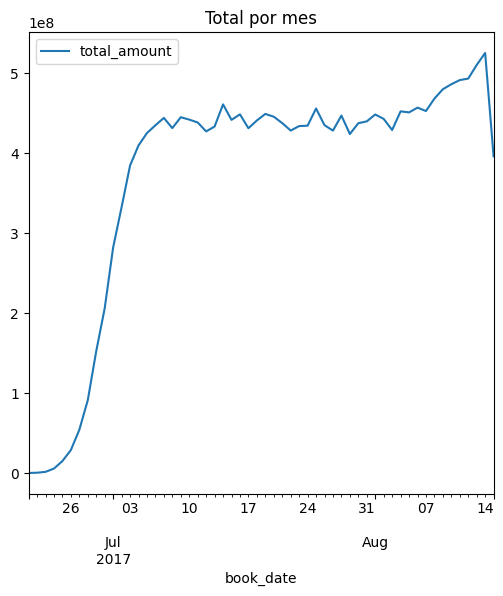

In [53]:
fig, ax = plt.subplots(figsize=(6,6))
df_bookings.resample('D').sum(numeric_only=True)['total_amount'].plot()
plt.title('Total por mes')
plt.legend(['total_amount'])
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_18060\2148920505.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bookings.resample('M').sum(numeric_only=True)['total_amount'].plot()


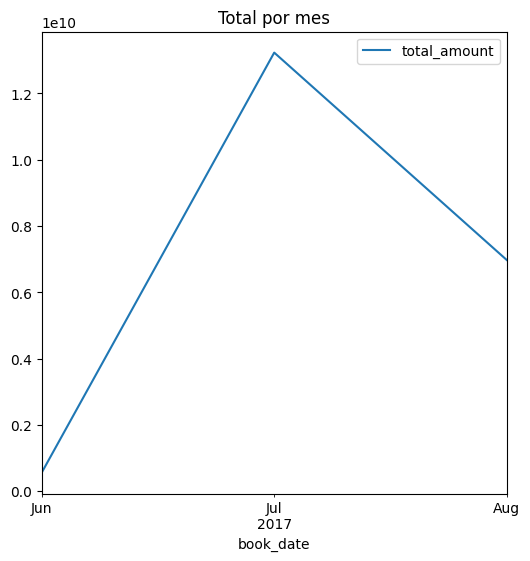

In [54]:
fig, ax = plt.subplots(figsize=(6,6))
df_bookings.resample('M').sum(numeric_only=True)['total_amount'].plot()
plt.title('Total por mes')
plt.legend(['total_amount'])
plt.show()

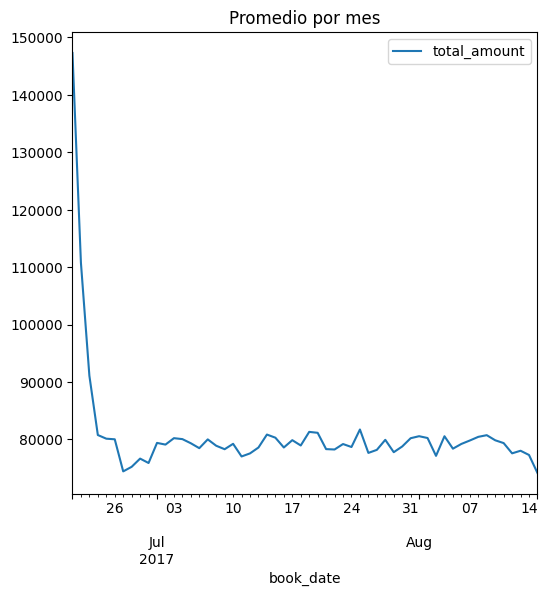

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
df_bookings.resample('D').mean(numeric_only=True)['total_amount'].plot()
plt.title('Promedio por mes')
plt.legend(['total_amount'])
plt.show()

In [41]:
print(bookings_mes)

Mes
6      557361000
7    13234251800
8     6975368100
Name: total_amount, dtype: int64


In [48]:
print(df_bookings_fechas.head(5))

                          book_ref  total_amount  Mes   Año  Dia
book_date                                                       
2017-07-05 03:12:00+03:00   00000F        265700    7  2017    5
2017-07-14 09:02:00+03:00   000012         37900    7  2017   14
2017-08-15 14:27:00+03:00   000068         18100    8  2017   15
2017-08-10 13:28:00+03:00   000181        131800    8  2017   10
2017-08-07 21:40:00+03:00   0002D8         23600    8  2017    7


In [57]:
# Calcular la media y desviación estándar
mean = np.mean(df_bookings_fechas['total_amount'])
std = np.std(df_bookings_fechas['total_amount'])

# Calcular el Z-Score manualmente

# Calcular el Z-Score manualmente
df_bookings_fechas['zscore'] = (df_bookings_fechas['total_amount'] - mean) / std
df_bookings_sin_outliers= df_bookings_fechas[df_bookings_fechas['zscore']>3]

C:\Users\PC\AppData\Local\Temp\ipykernel_18060\234017814.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bookings_sin_outliers.resample('M').sum(numeric_only=True)['total_amount'].plot()


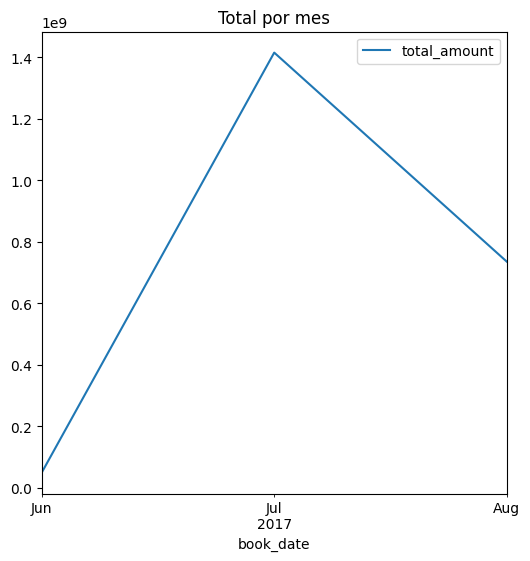

In [60]:
fig, ax = plt.subplots(figsize=(6,6))
df_bookings_sin_outliers.resample('M').sum(numeric_only=True)['total_amount'].plot()
plt.title('Total por mes')
plt.legend(['total_amount'])
plt.show()

In [22]:
meses = df_bookings_fechas['Mes'].unique()
print(meses)

[7 8 6]


In [31]:
df_bookings_grouped = df_bookings_fechas.groupby(['Año', 'Mes', 'Dia']).sum().reset_index()


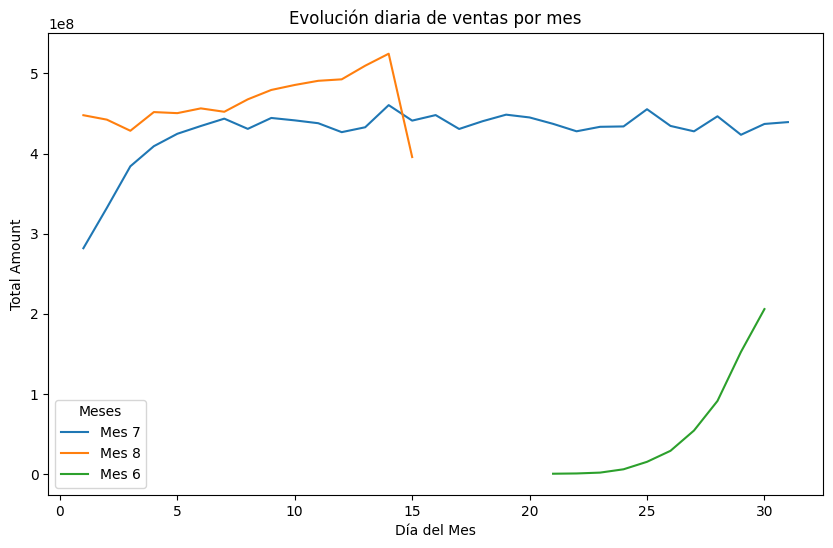

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
for mes in meses:
        ##df_bookings[df_bookings['Mes']== mes].resample('M').sum(numeric_only=True)['total_amount'].plot()
    df_mes = df_bookings_grouped[df_bookings_grouped['Mes']== mes]
    sns.lineplot(x='Dia', y='total_amount', data=df_mes, label=f'Mes {mes}')
plt.title('Evolución diaria de ventas por mes')
plt.xlabel('Día del Mes')
plt.ylabel('Total Amount')
plt.legend(title='Meses')
plt.show()

Tenemos la información de junio, julio y agosto del año 2017. Por lo que no se puede analizar estacionalidad en el comportamiento de compra. Si podes decir que en estos 3 meses hubo una gran volatilidad en las ventas. Se analizo sinlos outliers y tambien se registra amplia volatilidad. Por lo que se ve es que el es de junio tiene solo los ultimos dias y agosto , solo los primeros dias cargados a la base.

In [62]:
df_group4= df_bookings_fechas.groupby('Dia_semana')['total_amount'].sum().reset_index()
print(df_group4)

  Dia_semana  total_amount
0     Friday    2937922100
1     Monday    3135154700
2   Saturday    2954093500
3     Sunday    3076348100
4   Thursday    2807341500
5    Tuesday    3108278400
6  Wednesday    2747842600


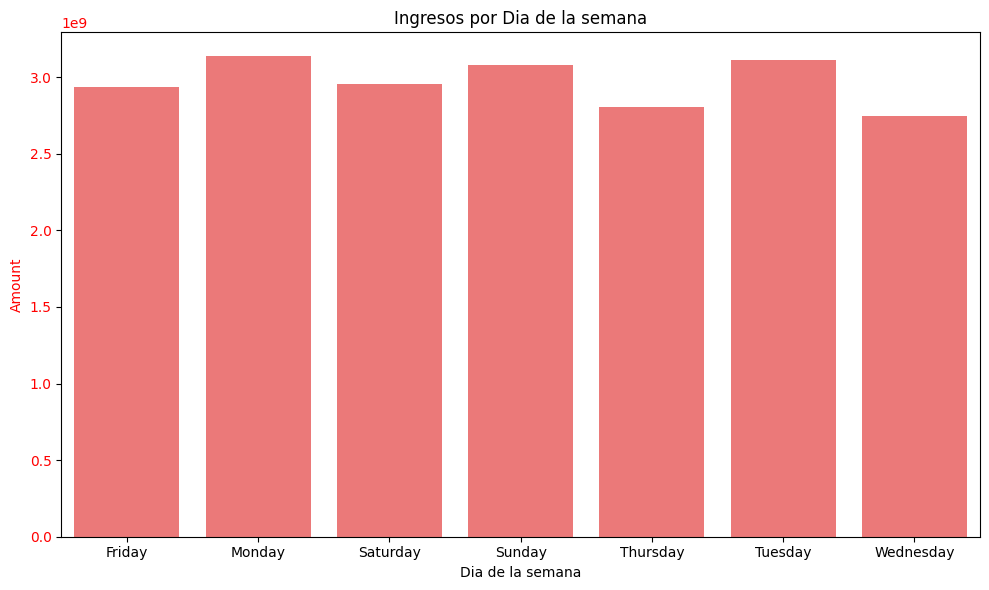

In [63]:
fig, ax1 = plt.subplots(figsize=(10, 6))


sns.barplot(data=df_group4, x='Dia_semana', y='total_amount' , ax=ax1, color='red', alpha=0.6, dodge = True)
ax1.set_ylabel('Amount', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Título del gráfico
plt.title('Ingresos por Dia de la semana')
ax1.set_xlabel('Dia de la semana') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [64]:
df_group5= df_bookings_fechas.groupby('Dia_semana')['book_ref'].count().reset_index()
print(df_group5)

  Dia_semana  book_ref
0     Friday     36931
1     Monday     39556
2   Saturday     37584
3     Sunday     39078
4   Thursday     35628
5    Tuesday     39381
6  Wednesday     34630


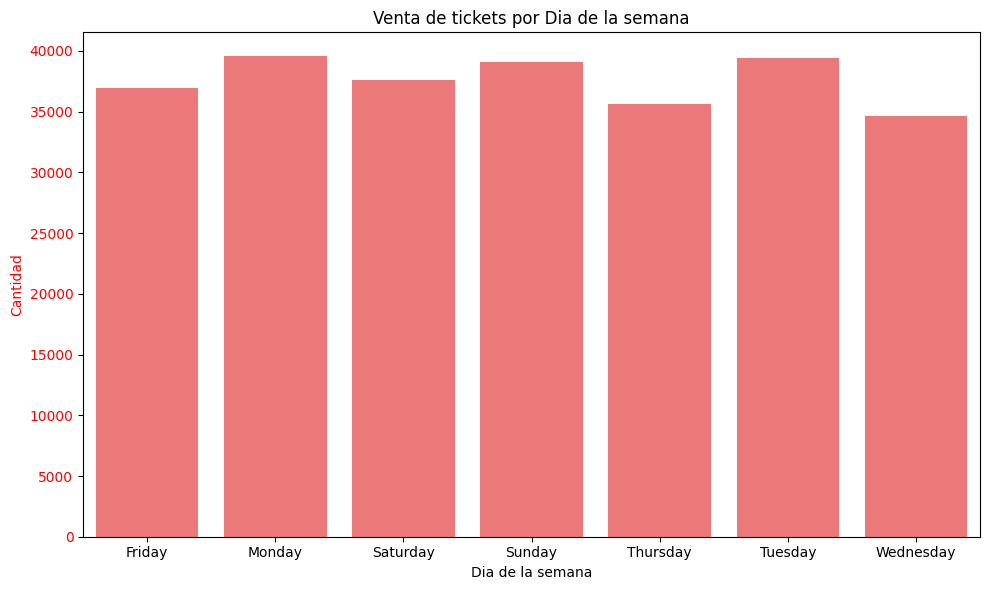

In [65]:
fig, ax1 = plt.subplots(figsize=(10, 6))


sns.barplot(data=df_group5, x='Dia_semana', y='book_ref' , ax=ax1, color='red', alpha=0.6, dodge = True)
ax1.set_ylabel('Cantidad', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Título del gráfico
plt.title('Venta de tickets por Dia de la semana')
ax1.set_xlabel('Dia de la semana') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

No se evidencia un dia o grupo de dias de preferencia de compra de pasajes

#### Tasa de conversion Booking a Boarding

In [68]:
tickets_boarded = df_boarding_passes['ticket_no'].nunique()
print(tickets_boarded)

238834


In [69]:
tickets_unicos = df_tickets['ticket_no'].nunique()
print(tickets_unicos)

366733


In [34]:
##tickets_merged = pd.merge(df_tickets, tickets_unicos_en_boarding, on='ticket_no', how='left', indicator=True)


In [35]:
##print(tickets_merged['_merge'].value_counts())


_merge
both          579686
left_only     127899
right_only         0
Name: count, dtype: int64


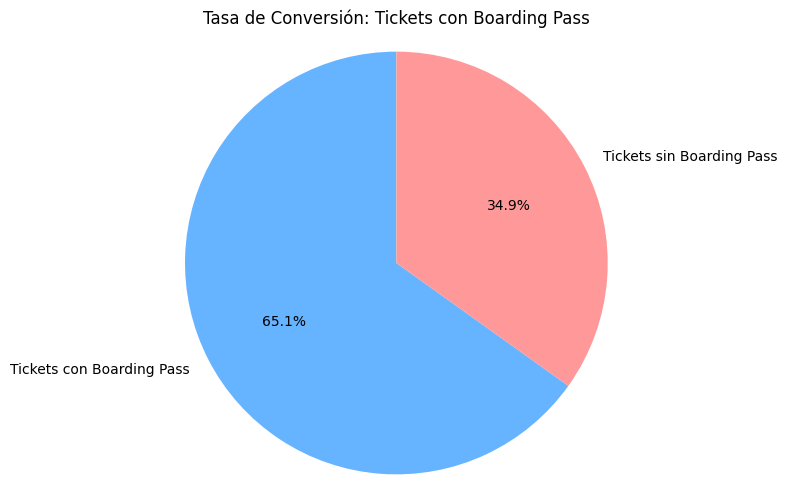

In [70]:
labels = ['Tickets con Boarding Pass', 'Tickets sin Boarding Pass']
sizes = [tickets_boarded, tickets_unicos - tickets_boarded]

# Graficar la tasa de conversión como gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Tasa de Conversión: Tickets con Boarding Pass')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()


El 35% de los pasajeros no aborda.

#### Patrones de compra: personal o de grupo

In [72]:
tickets_por_reserva =df_tickets.groupby('book_ref')['ticket_no'].count()
print(tickets_por_reserva)

       book_ref  ticket_no
0        00000F          1
1        000012          1
2        000068          1
3        000181          2
4        0002D8          1
...         ...        ...
262783   FFFEF3          1
262784   FFFF2C          1
262785   FFFF43          2
262786   FFFFA8          1
262787   FFFFF7          2

[262788 rows x 2 columns]


In [51]:
frecuencias =tickets_por_reserva['ticket_no'].unique()
print(frecuencias)

[1 2 3 4 5]


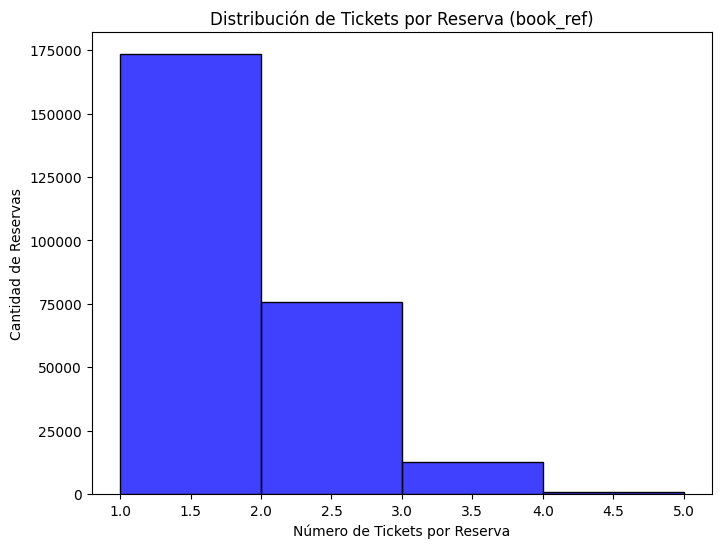

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(tickets_por_reserva['ticket_no'], bins=frecuencias, kde=False, color='blue')

# Añadir título y etiquetas
plt.title('Distribución de Tickets por Reserva (book_ref)')
plt.xlabel('Número de Tickets por Reserva')
plt.ylabel('Cantidad de Reservas')
plt.show()


La gran mayoria compra un ticket por booking, no se compran en grupos.

#### Anticipacion de compra

In [17]:
## llevamos la info de tickets a tickets_flights

Tickets_flights_con_bookref = pd.merge(df_tickets_flights, df_tickets, on=['ticket_no'],how='left')
print(Tickets_flights_con_bookref)

             ticket_no  flight_id fare_conditions  amount book_ref  \
0        0005432159776      30625        Business   42100   BA7FAF   
1        0005435212351      30625        Business   42100   BEAA38   
2        0005435212386      30625        Business   42100   EBE41D   
3        0005435212381      30625        Business   42100   86D03C   
4        0005432211370      30625        Business   42100   EA2AEA   
...                ...        ...             ...     ...      ...   
1045721  0005435097522      32094         Economy    5200   ED1E11   
1045722  0005435097521      32094         Economy    5200   ED1E11   
1045723  0005435104384      32094         Economy    5200   125AD5   
1045724  0005435104352      32094         Economy    5200   0F3B0E   
1045725  0005435104389      32094         Economy    5200   2E9061   

        passenger_id  
0        3952 666242  
1        9933 118369  
2        6788 033215  
3        6754 366923  
4        7198 737665  
...              ... 

In [18]:
## traemos el date a tickets_flights

Tickets_flights_con_date = pd.merge(Tickets_flights_con_bookref, df_bookings, on=['book_ref'], how='left')
print(Tickets_flights_con_date)


             ticket_no  flight_id fare_conditions  amount book_ref  \
0        0005432159776      30625        Business   42100   BA7FAF   
1        0005435212351      30625        Business   42100   BEAA38   
2        0005435212386      30625        Business   42100   EBE41D   
3        0005435212381      30625        Business   42100   86D03C   
4        0005432211370      30625        Business   42100   EA2AEA   
...                ...        ...             ...     ...      ...   
1045721  0005435097522      32094         Economy    5200   ED1E11   
1045722  0005435097521      32094         Economy    5200   ED1E11   
1045723  0005435104384      32094         Economy    5200   125AD5   
1045724  0005435104352      32094         Economy    5200   0F3B0E   
1045725  0005435104389      32094         Economy    5200   2E9061   

        passenger_id               book_date  total_amount  
0        3952 666242  2017-07-03 02:18:00+03        110300  
1        9933 118369  2017-06-29 08:4

In [19]:
## traemos el date departure a tickets_flights

Tickets_flights_con_datedeparture = pd.merge(Tickets_flights_con_date, df_flights, on=['flight_id'], how='left')
print(Tickets_flights_con_datedeparture)

             ticket_no  flight_id fare_conditions  amount book_ref  \
0        0005432159776      30625        Business   42100   BA7FAF   
1        0005435212351      30625        Business   42100   BEAA38   
2        0005435212386      30625        Business   42100   EBE41D   
3        0005435212381      30625        Business   42100   86D03C   
4        0005432211370      30625        Business   42100   EA2AEA   
...                ...        ...             ...     ...      ...   
1045721  0005435097522      32094         Economy    5200   ED1E11   
1045722  0005435097521      32094         Economy    5200   ED1E11   
1045723  0005435104384      32094         Economy    5200   125AD5   
1045724  0005435104352      32094         Economy    5200   0F3B0E   
1045725  0005435104389      32094         Economy    5200   2E9061   

        passenger_id               book_date  total_amount flight_no  \
0        3952 666242  2017-07-03 02:18:00+03        110300    PG0013   
1        9933 1

In [22]:
Tickets_flights_con_datedeparture['book_date']=pd.to_datetime(Tickets_flights_con_datedeparture['book_date'])

In [23]:
Tickets_flights_con_datedeparture['scheduled_departure']=pd.to_datetime(Tickets_flights_con_datedeparture['scheduled_departure'])


In [27]:
Tickets_flights_con_datedeparture['diferencia_dias'] = (Tickets_flights_con_datedeparture['scheduled_departure'] - Tickets_flights_con_datedeparture['book_date']).dt.days


In [28]:
anticipacion_de_compra= Tickets_flights_con_datedeparture.groupby('diferencia_dias')['ticket_no'].count().reset_index()
print(anticipacion_de_compra)

    diferencia_dias  ticket_no
0                 4          7
1                 5         59
2                 6        206
3                 7        687
4                 8       2013
5                 9       5213
6                10      11272
7                11      21555
8                12      35672
9                13      52545
10               14      68011
11               15      77494
12               16      78976
13               17      73305
14               18      64382
15               19      54922
16               20      49008
17               21      47401
18               22      50445
19               23      53174
20               24      54770
21               25      53180
22               26      48957
23               27      41586
24               28      32649
25               29      24771
26               30      17201
27               31      11160
28               32       6736
29               33       3904
30               34       2095
31      

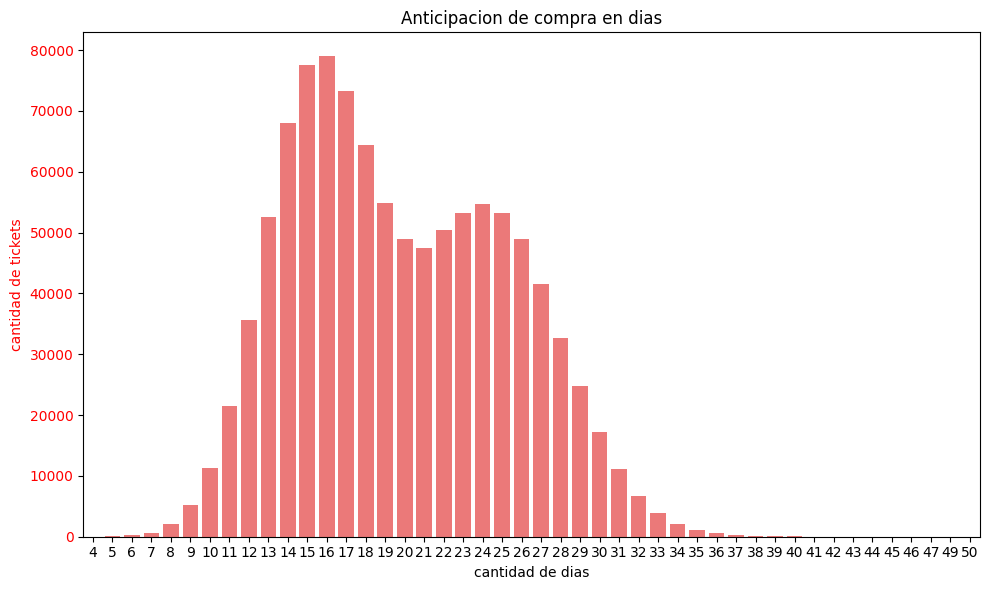

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))


sns.barplot(data=anticipacion_de_compra, x='diferencia_dias', y='ticket_no' , ax=ax1, color='red', alpha=0.6, dodge = True)
ax1.set_ylabel('cantidad de tickets', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Título del gráfico
plt.title('Anticipacion de compra en dias')
ax1.set_xlabel('cantidad de dias') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [34]:
print(Tickets_flights_con_datedeparture['diferencia_dias'].describe())

count   1,045,726.00
mean           19.80
std             5.53
min             4.00
25%            15.00
50%            19.00
75%            24.00
max            50.00
Name: diferencia_dias, dtype: float64


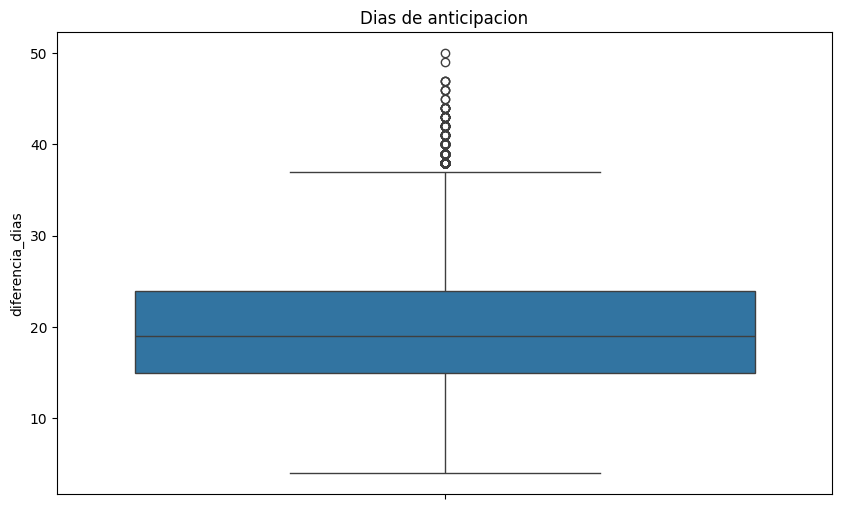

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Tickets_flights_con_datedeparture,y='diferencia_dias')
plt.title('Dias de anticipacion')
plt.show()


La mayoria de los clientes compra con una anticipacion promedio de 2o dias.